## Problem
$$p(x)=\mathcal{N}(x|\mu,\Lambda^{-1})$$
is a 2d Gaussian distribution, find 
$$q(x)=\mathcal{N}(x_1|m_1,s_1)\mathcal{N}(x_2|m_2,s_2)$$
(1) minimize $KL(q(x)|p(x))$

(2) minimize $KL(p(x)|q(x))$

## Solution
From **PRML Chapter 10** 

Note: $\Lambda^{-1}_{ij}$ means $\frac{1}{\Lambda_{ij}}$, not $(\Lambda^{-1})_{ij}$

Solution of (1):
$$\begin{aligned}
s_1 &= \Lambda_{11}^{-1} \\ s_2 &= \Lambda_{22}^{-1} \\
m_1 &= \mu_1 - \Lambda_{11}^{-1}\Lambda_{12}(m_2-\mu_2) \\
m_2 &= \mu_2 - \Lambda_{22}^{-1}\Lambda_{21}(m_1-\mu_1)
\end{aligned}$$

Solution of (2): PRML proves that q(x) is the product of marginals. MVN's marginals are given at Chapter 4 of MLAPP
$$\begin{aligned}
s_1 &= (\Lambda^{-1})_{11} = \Sigma_{11} \\ s_2 &= (\Lambda^{-1})_{22} = \Sigma_{22} \\
m_1 &= \mu_1 \\
m_2 &= \mu_2
\end{aligned}$$

## Example

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Solve m1, m2 iteratively
def get_m1_m2(Lambda,mu1,mu2,init_m1=0,init_m2=0,max_iter=500):
    m1, m2 = init_m1, init_m2
    for _ in range(max_iter):
        m1 = mu1 - 1/Lambda[0,0]*Lambda[0,1]*(m2-mu2)
        m2 = mu2 - 1/Lambda[1,1]*Lambda[1,0]*(m1-mu1)
    return m1,m2

def qp_approx(mu1,mu2,sigmax,sigmay,sigmaxy):
    Sigma = np.array([[sigmax**2,sigmaxy],[sigmaxy,sigmay**2]]) # covariance
    Lambda = np.linalg.inv(Sigma) # precision
    m1, m2 = get_m1_m2(Lambda,mu1,mu2)
    s1, s2 = 1/Lambda[0,0], 1/Lambda[1,1] #s1, s2 are 
    return m1, m2, s1, s2

# plot the contour of true dist. and approx dist.
def plot(mu1, mu2, sigmax, sigmay, sigmaxy, approx='qp'):
    if approx =='qp':
        m1, m2, s1, s2 = qp_approx(mu1,mu2,sigmax,sigmay,sigmaxy)
    elif approx == 'pq':
        m1, m2, s1, s2 = mu1, mu2, sigmax**2, sigmay**2
    else:
        raise ValueError("approx must be 'qp' or 'pq'")
    # make mesh grid, the grid is centered at (mu1,mu2)
    x = np.arange(mu1-1, mu1+1, 0.01)
    y = np.arange(mu2-1, mu2+1, 0.01)
    X, Y = np.meshgrid(x, y)
    Z = mlab.bivariate_normal(X, Y, sigmax=sigmax, sigmay=sigmay, mux=mu1, muy=mu2, 
                          sigmaxy=sigmaxy)
    # note that: 2d distribution as two 1d gaussian's product is a 2d gaussian
    # see: https://stats.stackexchange.com/questions/198362/how-to-define-a-2d-gaussian-using-1d-variance-of-component-gaussians
    Z1 = mlab.bivariate_normal(X, Y, sigmax=np.sqrt(s1), sigmay=np.sqrt(s2), 
                               mux=mu1, muy=mu2, sigmaxy=0)
    plt.figure(figsize=(8,7))
    plt.contour(X, Y, Z, colors='b')
    plt.contour(X,Y,Z1, colors='r')
    plt.title('KL(q|p) approx');
    plt.show()

parameters from [MLAPP](https://github.com/probml/pmtk3/blob/30d7a1952f3979b16e92dbfa4cd1ce0e402cf7d8/demos/KLpqGauss.m)

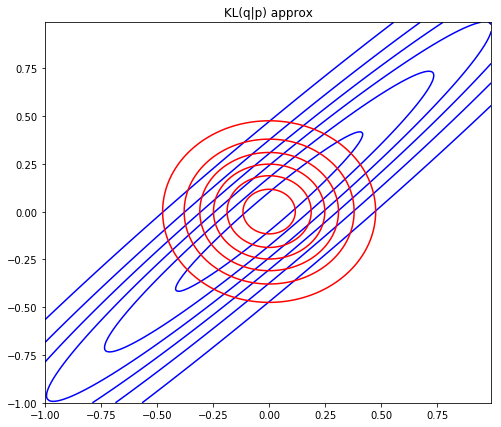

In [3]:
plot(mu1=0,mu2=0,sigmax=1,sigmay=1,sigmaxy=0.97,approx='qp')

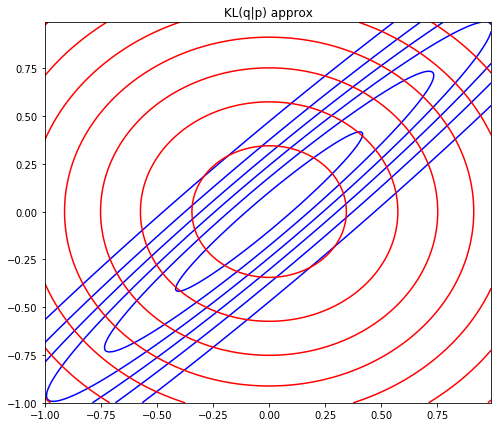

In [4]:
plot(mu1=0,mu2=0,sigmax=1,sigmay=1,sigmaxy=0.97,approx='pq')

try other parameters

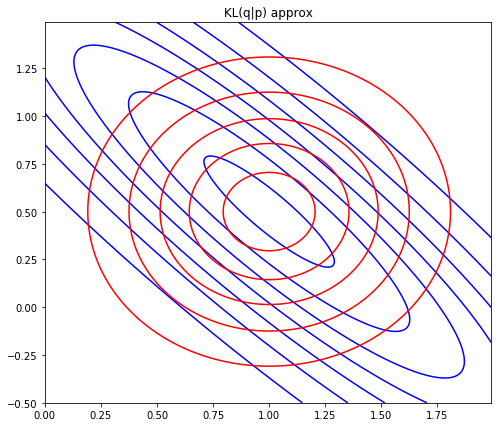

In [5]:
plot(mu1=1,mu2=0.5,sigmax=1,sigmay=1,sigmaxy=-0.9,approx='qp')

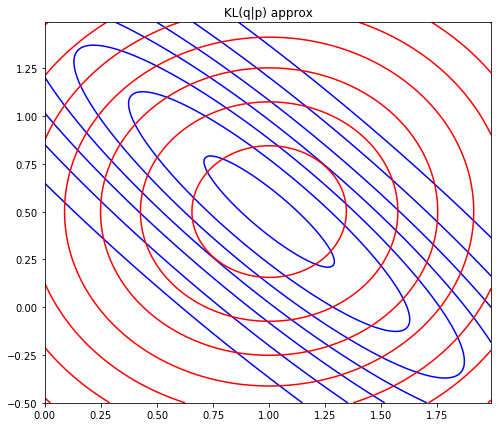

In [6]:
plot(mu1=1,mu2=0.5,sigmax=1,sigmay=1,sigmaxy=-0.9,approx='pq')